## EDA on Badminton Playability Based on Weather Conditions

##### The dataset has 4 variables (outlook, temperature, humidity, and wind) and has a 5th column of whether or not badmintion can be played. The goal of this analysis is to see which factors most impact the playability of badminton.

##### Dataset link: https://www.kaggle.com/datasets/aditya0kumar0tiwari/play-badminton

In [53]:
#import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("badminton_dataset.csv")

df.head()

,Outlook,Temperature,Humidity,Wind,Play_Badminton
0,Overcast,Cool,High,Weak,Yes
1,Sunny,Mild,Normal,Strong,No
2,Rain,Mild,Normal,Strong,No
3,Sunny,Cool,High,Weak,Yes
4,Sunny,Cool,High,Strong,No


In [15]:
df.shape

(36, 5)

In [16]:
print(df["Outlook"].unique())
print(df["Temperature"].unique())
print(df["Humidity"].unique())
print(df["Wind"].unique())

['Overcast' 'Sunny' 'Rain']
['Cool' 'Mild' 'Hot']
['High' 'Normal']
['Weak' 'Strong']


In [30]:
df_rain= df[df['Outlook'] == 'Rain']

df_rain

,Outlook,Temperature,Humidity,Wind,Play_Badminton
2,Rain,Mild,Normal,Strong,No
6,Rain,Cool,Normal,Strong,No
7,Rain,Cool,High,Strong,No
16,Rain,Cool,High,Weak,No
18,Rain,Hot,High,Weak,No
20,Rain,Hot,Normal,Strong,No
21,Rain,Mild,Normal,Weak,No
23,Rain,Mild,High,Weak,No
25,Rain,Cool,Normal,Weak,No
26,Rain,Hot,High,Strong,No


In [31]:
df_overcast= df[df['Outlook'] == 'Overcast']

df_overcast

,Outlook,Temperature,Humidity,Wind,Play_Badminton
0,Overcast,Cool,High,Weak,Yes
10,Overcast,Mild,High,Strong,No
11,Overcast,Hot,High,Strong,No
13,Overcast,Hot,Normal,Strong,No
15,Overcast,Cool,Normal,Strong,No
19,Overcast,Cool,High,Strong,No
24,Overcast,Cool,Normal,Weak,Yes
27,Overcast,Hot,Normal,Weak,Yes
28,Overcast,Mild,High,Weak,Yes
30,Overcast,Hot,High,Weak,Yes


In [32]:

# Count the number of 'Yes' entries directly with Pandas
count_of_yes = (df_overcast['Play_Badminton'] == "Yes").sum()

# Calculate the percentage of 'Yes' responses
pct_yes_overcast = count_of_yes / len(df_overcast) * 100  # multiply by 100 for a percentage

pct_yes_overcast

50.0

In [41]:
#make the above a function, we will have the function go through each unique value in a given column

# returns a dictionary with each unique value and the pct_yes

def calculate_play_percentage (data, column_to_analyze):
    result = {}
    for i in data[column_to_analyze].unique():
        df_temp = data[data[column_to_analyze] == i]
        count_yes = (df_temp['Play_Badminton'] == "Yes").sum()
        pct_yes = count_yes / len(df_temp) * 100
        result[i] = pct_yes
    return result

calculate_play_percentage(df,"Outlook")

{'Overcast': 50.0, 'Sunny': 50.0, 'Rain': 0.0}

In [42]:
calculate_play_percentage(df,"Humidity")

{'High': 33.33333333333333, 'Normal': 33.33333333333333}

### Yay, it works!

#### Our function takes in a dataframe and a column to analyze and returns the pct_yes of each unique value in the column

## Now let's use our function on all columns

In [55]:
results_dict = {}
for col in df.columns:
    results_dict[col] = calculate_play_percentage(df, col)

results_dict.pop('Play_Badminton', None) #remove the Play_Badminton one from the results_dict since it's not needed

results_dict

{'Outlook': {'Overcast': 50.0, 'Sunny': 50.0, 'Rain': 0.0},
 'Temperature': {'Cool': 33.33333333333333,
  'Mild': 33.33333333333333,
  'Hot': 33.33333333333333},
 'Humidity': {'High': 33.33333333333333, 'Normal': 33.33333333333333},
 'Wind': {'Weak': 66.66666666666666, 'Strong': 0.0}}

##### This dictionary shows all the different columns of our data set, and then the percentage of days where you can play badmition give that specific weather condition

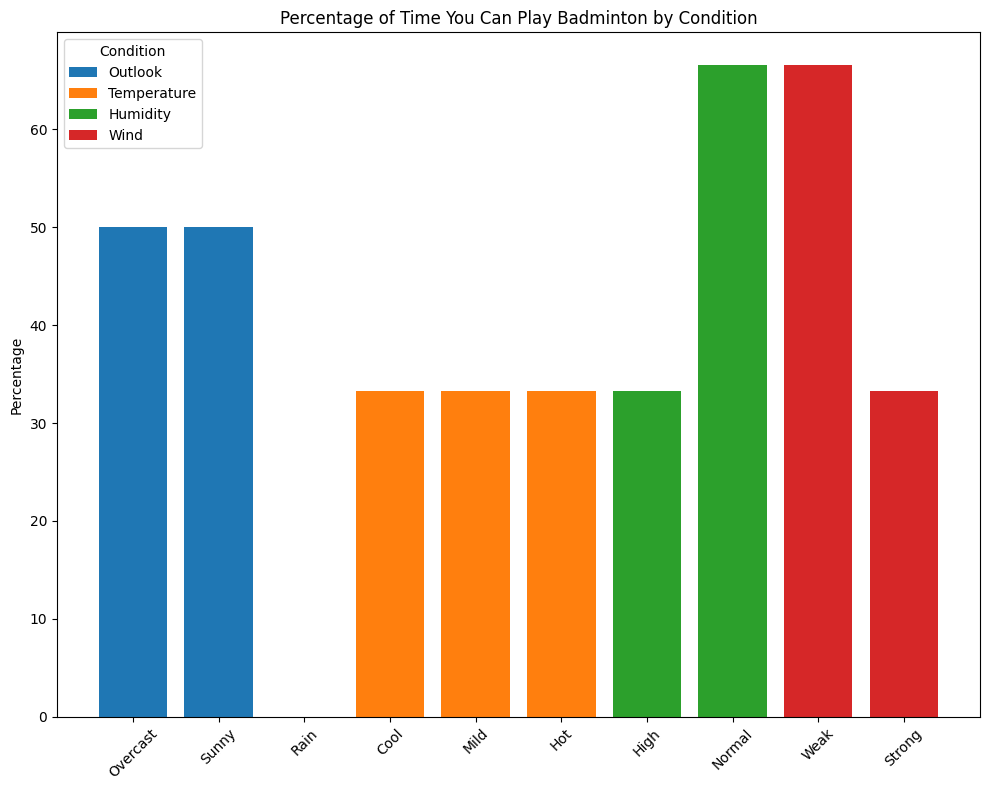

In [64]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Outlook', 'Temperature', 'Humidity', 'Wind']
results_dict = {
    'Outlook': {'Overcast': 50.0, 'Sunny': 50.0, 'Rain': 0.0},
    'Temperature': {'Cool': 33.3, 'Mild': 33.3, 'Hot': 33.3},
    'Humidity': {'High': 33.3, 'Normal': 66.6},
    'Wind': {'Weak': 66.6, 'Strong': 33.3}
}

fig, ax = plt.subplots(figsize=(10, 8))
for i, category in enumerate(categories):
    data = results_dict[category]
    ax.bar(data.keys(), data.values(), label=category)

ax.set_ylabel('Percentage')
ax.set_title('Percentage of Time You Can Play Badminton by Condition')
ax.legend(title='Condition')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## This chart shows based on condition (Ex. if the Outlook is Overcast), what percentage of the time you are able to play badminton

#### Based on the chart: 

##### Rain makes it most likely to cancel badminton (in our data, a 100% chance). 
##### Normal Humidity and Weak Wind give you the highest chance of being able to play badminton. 